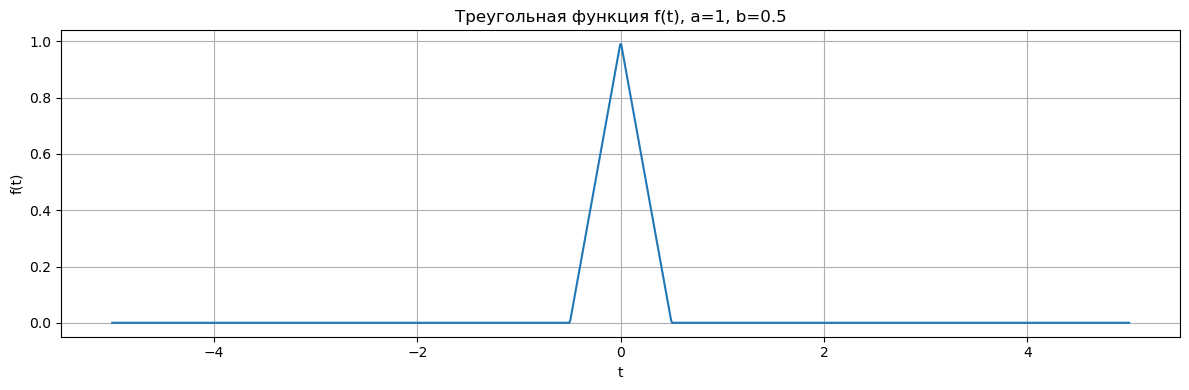

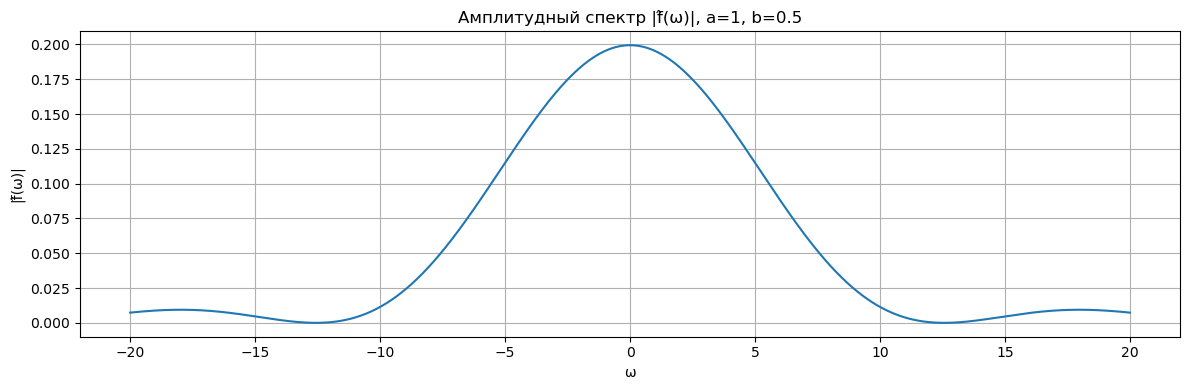

a = 1, b = 0.5
Интеграл |f(t)|^2 dt = 0.3333
Интеграл |f̂(ω)|^2 dω = 0.3331
Разность = 2.4719e-04
----------------------------------------


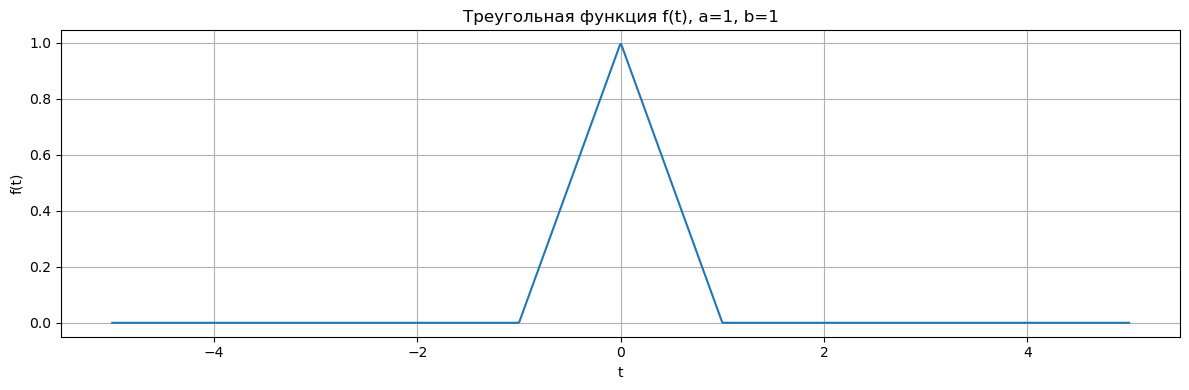

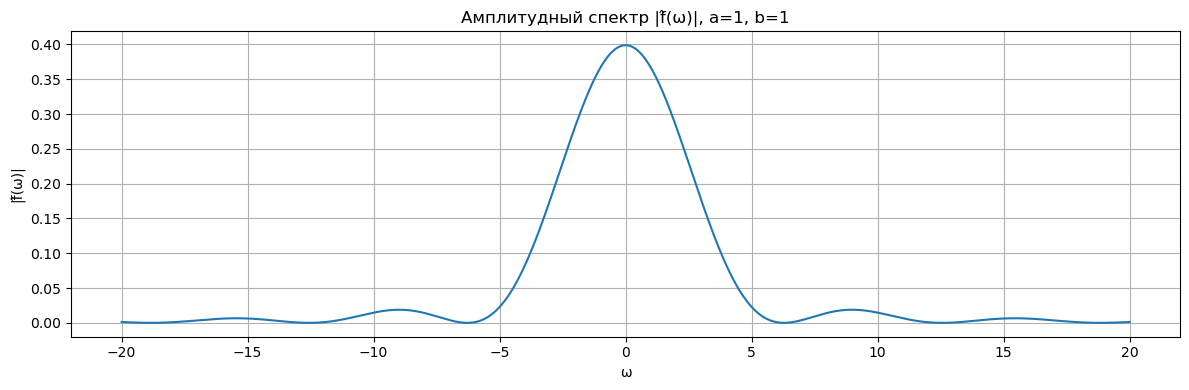

a = 1, b = 1
Интеграл |f(t)|^2 dt = 0.6666
Интеграл |f̂(ω)|^2 dω = 0.6666
Разность = 7.3923e-05
----------------------------------------


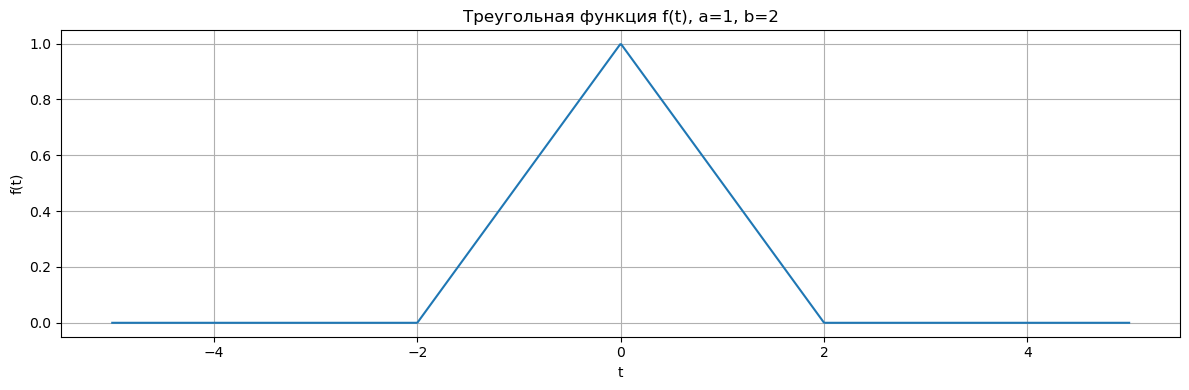

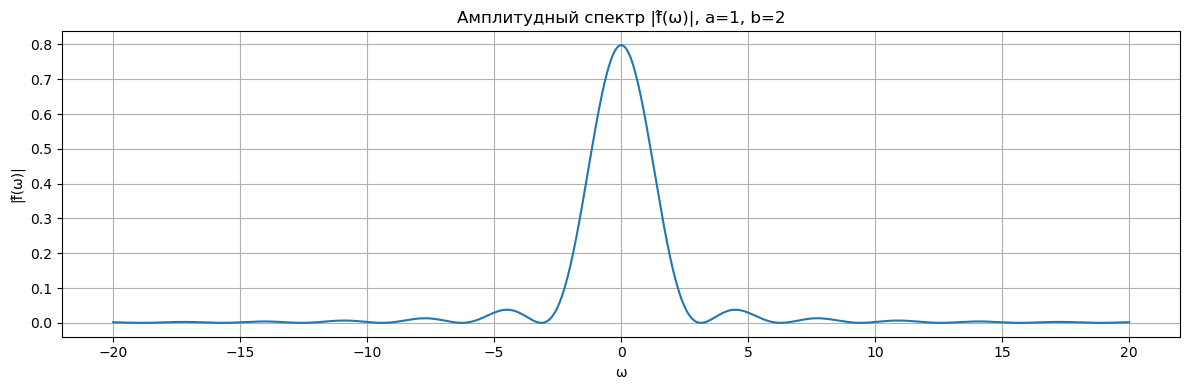

a = 1, b = 2
Интеграл |f(t)|^2 dt = 1.3333
Интеграл |f̂(ω)|^2 dω = 1.3333
Разность = 1.3377e-05
----------------------------------------


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

def triangle_function(t, a=1, b=1):
    return np.where(np.abs(t) <= b, a - a * np.abs(t) / b, 0)

def fourier_transform_triangle(omega, a=1, b=1):
    numerator = 1 - np.cos(omega * b)
    denominator = (omega**2) * b
    result = (2 * a / np.sqrt(2 * np.pi)) * (numerator / denominator)
    result[np.isnan(result)] = a * b / np.sqrt(2 * np.pi)  # значение при omega=0
    return result

# Параметры
a = 1
b_values = [0.5, 1, 2]

t = np.linspace(-5, 5, 1000)
omega = np.linspace(-20, 20, 2000)

for b in b_values:
    f_t = triangle_function(t, a, b)
    f_omega = fourier_transform_triangle(omega, a, b)

    # График f(t)
    plt.figure(figsize=(12, 4))
    plt.plot(t, f_t)
    plt.title(f"Треугольная функция f(t), a={a}, b={b}")
    plt.xlabel("t")
    plt.ylabel("f(t)")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"triangle_function_b{b}.png")
    plt.show()

    # График спектра
    plt.figure(figsize=(12, 4))
    plt.plot(omega, np.abs(f_omega))
    plt.title(f"Амплитудный спектр |f̂(ω)|, a={a}, b={b}")
    plt.xlabel("ω")
    plt.ylabel("|f̂(ω)|")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"triangle_spectrum_b{b}.png")
    plt.show()

    # Проверка Парсеваля
    lhs = simps(np.abs(f_t)**2, t)
    rhs = simps(np.abs(f_omega)**2, omega)
    print(f"a = {a}, b = {b}")
    print(f"Интеграл |f(t)|^2 dt = {lhs:.4f}")
    print(f"Интеграл |f̂(ω)|^2 dω = {rhs:.4f}")
    print(f"Разность = {abs(lhs - rhs):.4e}")
    print("-" * 40)
